

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries which are require  for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from  the link
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
## checking first 10 datas
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Let's check is there any null values or not
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [5]:
## to check the general description about the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# As there is no null value we will plot a scatter plot and check relationship between the two variables

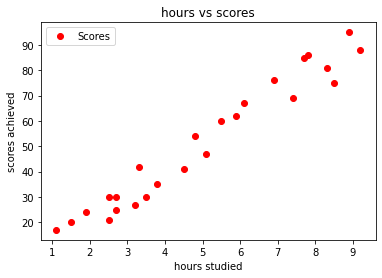

 the relationship between hours studied and scores achieved is shown above


In [6]:

df.plot(x="Hours",y="Scores",style="o",color="r")
plt.title("hours vs scores")
plt.xlabel("hours studied")
plt.ylabel("scores achieved")
plt.show()
print(" the relationship between {} and {} is shown above".format("hours studied","scores achieved"))

# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.




# Now we will prepare our data

In [7]:
# We will divide our data into independent or dependent variables
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values


#  the next step is to split this data into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=0)

# Training the Algorithm


In [9]:
#We have splitted our data into training and testing sets, and now its time to train our algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [10]:
lreg.fit(X_train,y_train)
print("training completed")

training completed


In [11]:
#plotting the regresion line
line = lreg.coef_*X+lreg.intercept_


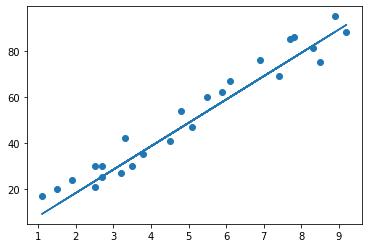

In [12]:
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Making Predictions

In [13]:
#since we have trained our algorithm, it's time to make some predictions.
y_predict=lreg.predict(X_test)
y_predict

array([13.19611447, 30.43265949, 73.01706485, 23.3352586 , 57.80834865,
       36.51614597, 17.25177212, 77.0727225 , 67.94749278,  9.14045681,
       49.69703334, 76.05880809, 31.4465739 , 82.14229457, 91.26752428,
       59.83617747, 33.47440273, 25.36308742, 53.752691  , 25.36308742])

In [14]:
#comparing actual and predicted value
df=pd.DataFrame({'actual':y_test,'predicted':y_predict})
df

,actual,predicted
0,20,13.196114
1,27,30.432659
2,69,73.017065
3,30,23.335259
4,62,57.808349
5,35,36.516146
6,24,17.251772
7,86,77.072722
8,76,67.947493
9,17,9.140457


In [15]:
# now its time to check our task data that is how much a student should score if he/she spends 9.25 hours in study
hours=9.25
own_predict=lreg.predict([[hours]])
print("Predicted Score = {}".format(own_predict[0]))


Predicted Score = 91.77448149120502


# Evaluating the model


In [16]:
#The final step is to evaluate the performance of algorithm. 
from sklearn import metrics
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))

mean absolute error: 5.335035442373328


# Task 1 completed